# Segmentação de Imagens Parte 2

In [5]:
import cv2
import numpy as np

## 1. Segmentação de imagens preto e branco

A função `cv2.inRange` realiza a operação de limiarização. Veja [na documentação do OpenCV](https://docs.opencv.org/3.4/da/d97/tutorial_threshold_inRange.html) mais detalhes sobre ela.

A função `cv2.inRange` recebe como parâmetros a imagem de entrada, o valor mínimo e o valor máximo do intervalo de valores que serão considerados para a limiarização. O resultado da função é uma imagem binária, onde os pixels que estão dentro do intervalo são brancos e os pixels que estão fora do intervalo são pretos.

Isso pode ser observado no exemplo abaixo.

In [11]:
rintin = cv2.imread('img/RinTinTin.jpg', cv2.IMREAD_GRAYSCALE)
mask = cv2.inRange(rintin, 0, 30)
cv2.imshow("rintin", rintin)
cv2.imshow("mask", mask)
cv2.waitKey()
cv2.destroyAllWindows()

# Segmentação de imagens coloridas
## Detecção de cores com HSV

Para imagens coloridas, o mais comum é trabalhar no espaço de cores **HSV - Hue, Saturation, Value**, onde o canal H (matiz) indica o valor da cor dentro dos círculos de cores básicas. No OpenCV, o canal Hue é representado através da metade do ângulo em graus no círculo de cores. Assim os valores variam de 0 a 180, o que cabe numa representação de 8 bits.

![](https://upload.wikimedia.org/wikipedia/commons/8/8f/HSV_cylinder.jpg)

A imagem abaixo mostra claramente como o canal H varia de acordo com a cor, seguindo o círculo de cores.

**IMPORTANTE:** Lembre-se de dividir o valor por 2 para obter o valor do canal H no OpenCV.

![](img/hsv_circle.jfif)

**Fonte**: [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/8/8f/HSV_cylinder.jpg) 

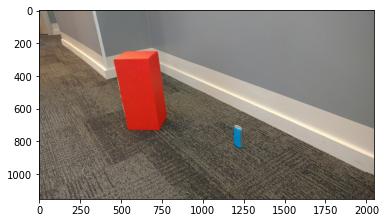

In [5]:
img_color = cv2.imread("img/hall_box_battery1.jpg")
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
plt.imshow(img_rgb)
plt.show()

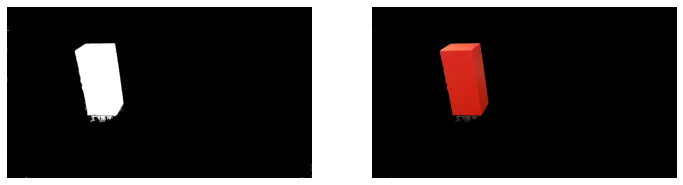

In [16]:
low = np.array([0, 50, 50])
high = np.array([10, 255, 255])
mask = cv2.inRange(img_hsv, low, high)

selecao = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.axis('off')
plt.imshow(mask, cmap="gray", vmin=0, vmax=255)

plt.subplot(122)
plt.axis('off')
plt.imshow(selecao)
plt.show()

No exemplo acima, utilizamos novamente a função `cv2.inRange()` para criar uma máscara que seleciona apenas os pixels que pertencem a caixa vermelha.

Depois, utilizando a operação AND do openCV, aplicamos a máscara na imagem original, para que apenas os pixels que pertencem à caixa vermelha sejam exibidos.

Mas como os valores de HSV foram escolhidos?
Para o valor de H, pelo círculo HSV acima, podemos ver que o vermelho está entre 0 e 30, e entre 150 e 180, para essa imagem, escolhemos o intervalo entre 0 e 10.

No caso dos valores de Saturation e Value, escolhemos o intervalo entre 50 e 255, pois queremos que a cor seja bem saturada e brilhante, como podemos observar no retângulo HSV acima.

# Tarefa: Implementação do modulo de visão
## Sobre GUI

Considerando que o ajustes dos limiares do filtro de cor são feitos de forma manual, preparamos uma *graphical user interface* (GUI) para facilitar a calibração desses valores, ela pode ser baixada nos links abaixo:

**[range_tool.py](range_tool.py)**

**[module.py](module.py)**

Esta GUI foi desenvolvida em Python utilizando a biblioteca [QT5](https://pypi.org/project/PyQt5/). Para instalar a biblioteca, basta executar o seguinte comando no terminal:

```bash
pip install PyQt5
```

Para executar a GUI, basta executar o seguinte comando no terminal:

```bash
python range_tool.py
```

## Parte 1
A interface está pronta para ser utilizada, mas ela depende do arquivo [module.py](module.py) para funcionar. Neste arquivo temos a classe `ImageModule` que é responsável por executar as funções de processamento de imagem que serão utilizados pela GUI.

Durante este módulo, vamos desenvolver as funções de processamento de imagem desenvolvendo a GUI e uma biblioteca que pode ser utilizada durante todo o curso.

Neste momento, você deve:

1- Implementar a função `main` do arquivo [module.py](module.py), com isso será possível executar o arquivo `module.py` diretamente para testar o seu trabalho;

2- Implementar a função `color_filter` da classe `ImageModule`. Esta função deve receber uma imagem e retornar uma máscara;

3- Agora você pode executar a GUI! Abra uma imagem e mova os sliders para encontrar os limiares que filtram a cor desejada.

**AVISO:** Tanto o arquivo `range_tool.py` quando o arquivo `module.py` devem estar na mesma pasta para que a GUI funcione corretamente.

**DICA 1:** Na *atividade 1* do módulo 1, mostramos como utilizar o OpenCV para ler e visualizar uma imagem.

**DICA 2:** Tanto a GUI quando o arquivo `module.py` podem ser utilizadas como base para o desenvolvimento de todas as tarefas da disciplina.

**DICA 3:** Enquanto estiver desenvolvendo tarefas da disciplina, recomendamos que você crie uma classe que herde da classe `ImageModule` e implemente as funções necessárias para cada tarefa. Isso vai facilitar o desenvolvimento e a reutilização de código.

# Prática

**Exercício 1**: Na imagem da caixa acima, `img/hall_box_battery1.jpg`, converta a imagem para HSV e filtre o rodapé branco da parede. Mostre a imagem com apenas o rodapé branco.

**Exercício 2**: Faça o mesmo que o exercício anterior, mas agora converta a imagem para tons de cinza. Foi mais fácil encontrar os limiares? Por quê?

<p>
<details>
<summary>Resposta</summary>

<pre><code>O processo de converter imagens para tons de cinza e então fazer a segmentação é muito util quando queremos remover fundos brancos, por exemplo.</code></pre>

</details>
</p>